In [24]:
import pandas as pd 
import talib as ta
import os 
import sys
windows = 'P:/6. DSMA/99. Thesis/Github/thesis'
os.chdir(windows)

sys.path.append('P:/6. DSMA/99. Thesis/Github/thesis/scripts')
import pipeline_crypto_prices
from pipeline_crypto_prices import get_prices

import matplotlib.pyplot as plt

In [20]:
btc = get_prices(start_date='2018-01-01')
btc

Data for BTC-USD from 2018-01-01 to 2024-07-10 has been downloaded successfully


,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,2017-12-31,12897.700195,14377.400391,12755.599609,14156.400391,14156.400391,12136299520,NaN
1,2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,-0.035263
2,2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,0.097011
3,2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,0.014611
4,2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,0.026196
...,...,...,...,...,...,...,...,...
2378,2024-07-05,57022.808594,57497.152344,53717.375000,56662.375000,56662.375000,55417544033,-0.005534
2379,2024-07-06,56659.074219,58472.546875,56038.960938,58303.539063,58303.539063,20610320577,0.028964
2380,2024-07-07,58239.429688,58371.121094,55793.324219,55849.109375,55849.109375,20553359505,-0.042097
2381,2024-07-08,55849.574219,58131.335938,54321.019531,56705.097656,56705.097656,39766159899,0.015327


In [83]:
?ta.CDL3BLACKCROWS

Signature: ta.CDL3BLACKCROWS(open, high, low, close)
Docstring:
CDL3BLACKCROWS(open, high, low, close)

Three Black Crows (Pattern Recognition)

Inputs:
    prices: ['open', 'high', 'low', 'close']
Outputs:
    integer (values are -100, 0 or 100)
Type:      function

In [39]:
# Get a list of all available functions
all_functions = ta.get_functions()

# Print the list of all available functions
for func in all_functions:
    print(func)

HT_DCPERIOD
HT_DCPHASE
HT_PHASOR
HT_SINE
HT_TRENDMODE
ADD
DIV
MAX
MAXINDEX
MIN
MININDEX
MINMAX
MINMAXINDEX
MULT
SUB
SUM
ACOS
ASIN
ATAN
CEIL
COS
COSH
EXP
FLOOR
LN
LOG10
SIN
SINH
SQRT
TAN
TANH
ADX
ADXR
APO
AROON
AROONOSC
BOP
CCI
CMO
DX
MACD
MACDEXT
MACDFIX
MFI
MINUS_DI
MINUS_DM
MOM
PLUS_DI
PLUS_DM
PPO
ROC
ROCP
ROCR
ROCR100
RSI
STOCH
STOCHF
STOCHRSI
TRIX
ULTOSC
WILLR
BBANDS
DEMA
EMA
HT_TRENDLINE
KAMA
MA
MAMA
MAVP
MIDPOINT
MIDPRICE
SAR
SAREXT
SMA
T3
TEMA
TRIMA
WMA
CDL2CROWS
CDL3BLACKCROWS
CDL3INSIDE
CDL3LINESTRIKE
CDL3OUTSIDE
CDL3STARSINSOUTH
CDL3WHITESOLDIERS
CDLABANDONEDBABY
CDLADVANCEBLOCK
CDLBELTHOLD
CDLBREAKAWAY
CDLCLOSINGMARUBOZU
CDLCONCEALBABYSWALL
CDLCOUNTERATTACK
CDLDARKCLOUDCOVER
CDLDOJI
CDLDOJISTAR
CDLDRAGONFLYDOJI
CDLENGULFING
CDLEVENINGDOJISTAR
CDLEVENINGSTAR
CDLGAPSIDESIDEWHITE
CDLGRAVESTONEDOJI
CDLHAMMER
CDLHANGINGMAN
CDLHARAMI
CDLHARAMICROSS
CDLHIGHWAVE
CDLHIKKAKE
CDLHIKKAKEMOD
CDLHOMINGPIGEON
CDLIDENTICAL3CROWS
CDLINNECK
CDLINVERTEDHAMMER
CDLKICKING
CDLKICKINGBYLENGTH
CDLL

In [100]:
btc['Kama'] = ta.KAMA(btc['Close'])
btc['Max'] = ta.ATAN(btc['Close'])
btc['MACD']  = ta.VAR(btc.Close)

btc['Pattern'] = ta.CDLLONGLINE(btc.Open, btc.High, btc.Low, btc.Close)

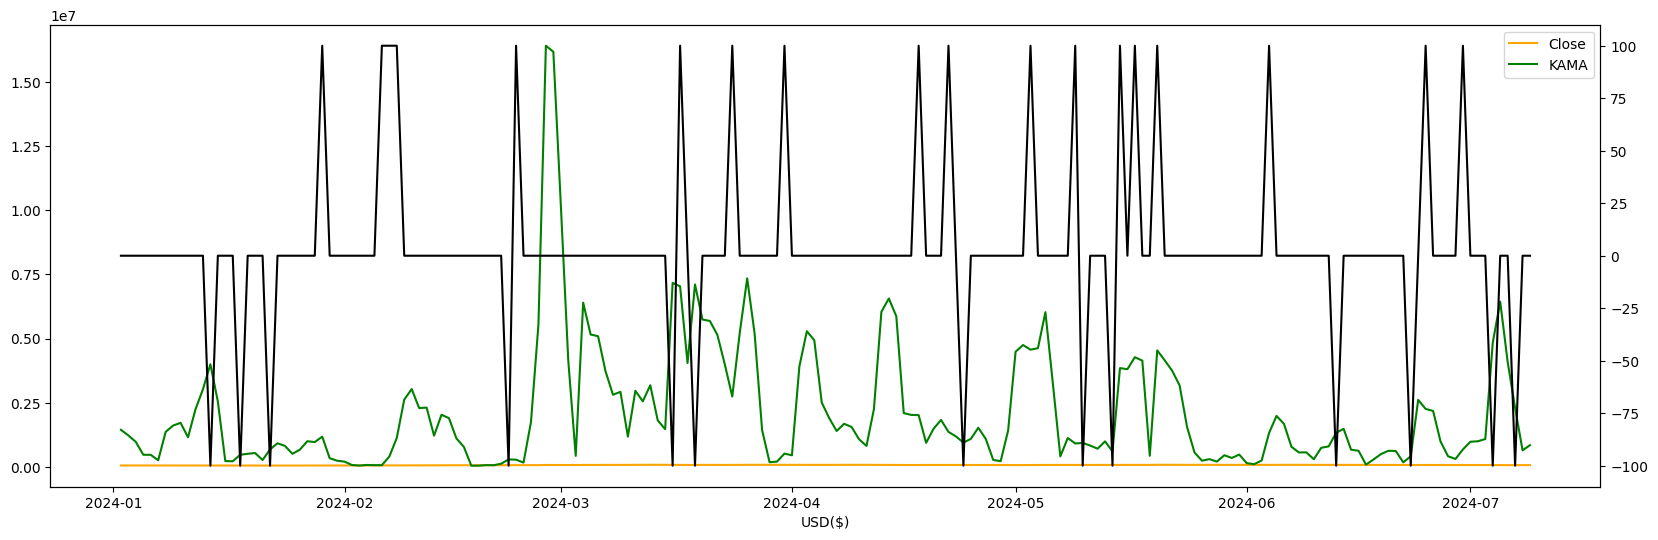

In [102]:
btc_d = btc[btc.Date > '2024-01-01'].reset_index(drop=True).copy()

fig, ax1 = plt.subplots(1, 1, figsize=(20, 6))

ax1.plot(btc_d.Date, btc_d.Close, color='orange', label='Close')
ax1.plot(btc_d.Date, btc_d.MACD, color='green')
ax1.set_xlabel('USD($)')
ax1.legend(['Close', 'KAMA'])

ax2 = ax1.twinx()
ax2.plot(btc_d.Date, btc_d.Pattern, color='black')
#ax2.plot(btc_d.Date, btc_d.Signal, color='black')
##ax2.plot(btc_d.Date, btc_d.Hist, color='black')